**TRABAJO PRÁCTICO Nº1**

Natasha Itzcovich - Mercedes Dertiano

##**Ejercicio 2:**

A partir del Pima Indians Diabetes Dataset predecir la aparición de diabetes basado en diferentes valores diagnósticos.

Este conjunto de datos es del  National Institute of Diabetes and Digestive and Kidney Diseases originalmente. 

Posee ciertas limitaciones para la selección de los pacientes a partir de una base de datos más grande. En particular, son todos pacientes femeninos de al menos 21 años de edad de herencia Pima Indian.

Las variables:


*   Pregnancies (embarazos): Número de embarazos
*   Glucose: Concentración de glucosa en sangre a 2 horas de una prueba de tolerancia de glucosa oral.
*   BloodPresure (Presión sanguinea): Presión diastólica (mm Hg)
*   SkinThickness: Tamaño del pliege de la piel del triceps (mm)
*   Insulin: Insulina en sangre a 2 horas (mu U/ml)
*   BMI: Indice de masa corporal (peso en kg / (altura en metros)^2)
*   DiabetesPedigreeFunction: Una función que estima el likelihood de tener diabetes dado el historial familiar
*   Age: Edad (años)
*   Outcome: Variable 0 o 1 (0 no posee diabtes, 1 posee diabetes)

Este ejercicio consta de dos partes:

1.   Realizar un EDA completo de este dataset incluyendo: cantidad de valores nulos de las variables, número de personas para cada clase, análisis de distribuciones de las variables (por ejemplo se pueden usar histogramas), análisis de outliers y correlación entre variables. Recordar explicar las diferentes decisiones que se vayan tomando respecto de la limpieza y calidad de los datos

2.   Generar un clasificador utilizando las variables que se consideren óptimas. Recordar elegir una métrica para medir el desempeño del modelo y validar los resultados. 


# Iniciando

In [101]:
#Montando el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import plotly.graph_objects as go
import plotly.offline as py
import math 
import seaborn as sn

In [103]:
#Importando dataframe
df = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/Datasets/diabetes.csv', delimiter=',')
#df = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/TP1/diabetes.csv', delimiter='|')

# Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
#Viendo las primeras filas del dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Tipos de variable por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Algunos estadísticos

In [ ]:
#Algunos datos estadísticos, como media, desvío estandar, mínimo y máximo de cada columna
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Se destaca que en este análisis no se incluye a las variables tipo **bool** o **object**.


Se analiza 'Outcome' por separado, ya que es una variable categórica. Se grafican el conteo y la proporción de casos diabéticos.

In [ ]:
#Análisis de 'Outcome'
D = df[(df['Outcome'] != 0)]; H = df[(df['Outcome'] == 0)]
#Funciones para graficar:
def target_count():
    trace = go.Bar( x = df['Outcome'].value_counts().values.tolist(), y = ['No diabéticos','Diabéticos' ], orientation = 'h', text=df['Outcome'].value_counts().values.tolist(), textfont=dict(size=15),textposition = 'auto',opacity = 0.8,marker=dict(color=['lightskyblue', 'gold'],line=dict(color='#000000',width=1.5)))
    layout = dict(title =  'Conteo de casos')
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
def target_percent():
    trace = go.Pie(labels = ['No diabéticos','Diabéticos'], values = df['Outcome'].value_counts(), textfont=dict(size=15), opacity = 0.8,marker=dict(colors=['lightskyblue', 'gold'], line=dict(color='#000000', width=1.5)))
    layout = dict(title =  'Distribución de casos')
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
#Gráficos
target_count()
target_percent()    

## Análisis de variables

### Histogramas I

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb959ab09d0>,
      dtype=object)

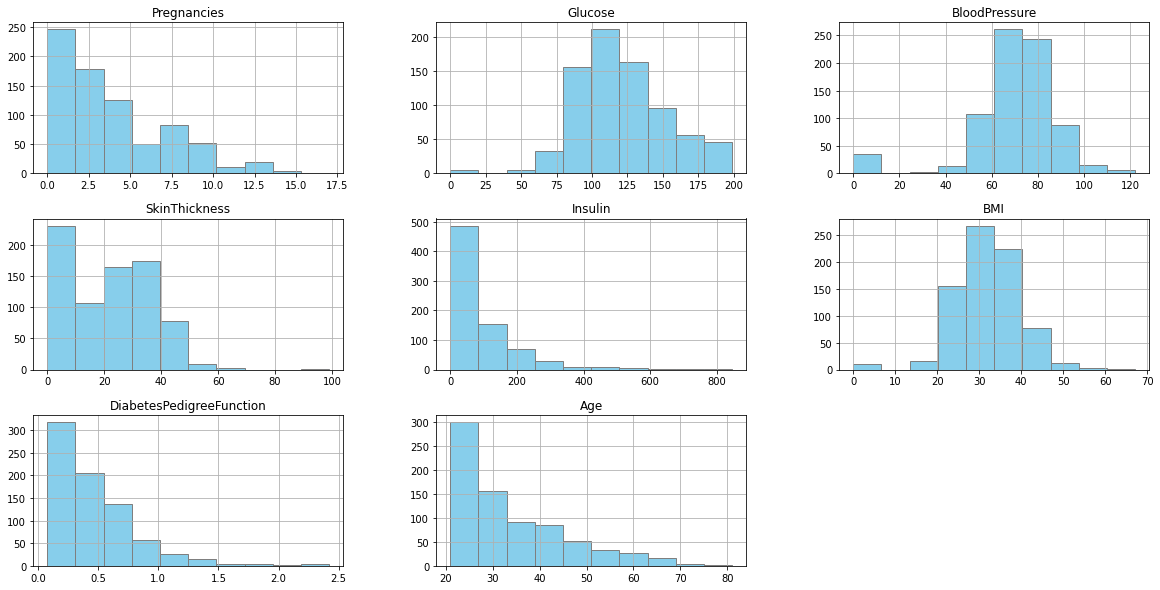

In [ ]:
#HISTOGRAMAS sin filtrar
df_histograma = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_histograma.hist(figsize = (20,10), grid=True, color = "skyblue", linewidth=1, edgecolor='tab:grey')

En base a los histogramas, se destaca que algunas variables presentan valores inválidos. En particular, la presión sanguínea, la glucemia, el grosor de la piel, el nivel de insulina y el BMI poseen valores iguales a 0 . A continuación se detallan estos datos y se procede a reemplazarlos por 'NaN'.




### Valores inválidos

En base a estos histogramas, se destaca que algunas variables presentan valores inválidos. En particular, la presión sanguínea, la glucemia, el grosor de la piel, el nivel de insulina y el BMI poseen valores iguales a 0 . A continuación se detallan estos datos y se procede a reemplazarlos por 'NaN'.

In [104]:
#GLUCOSA
#Pacientes con glucosa=0
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [105]:
#PRESIÓN SANGUÍNEA
#Pacientes con bp=0
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [106]:
#GROSOR DE PIEL
#Pacientes con st=0
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [107]:
#INSULINA
#Pacientes con insulina=0
df[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [108]:
#ÍNDICE DE MASA CORPORAL
#Pacientes con BMI=0
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


#### Reemplazo de valores inválidos 

Se procede a modificar los valores iguales a ceros por NaN

In [109]:
#Reemplazo de valores inválidos por NaN
df_filtrado=df

#GLUCOSA
df_filtrado.loc[df_filtrado['Glucose'] == 0, 'Glucose' ] = np.NaN
#PRESIÓN SANGUÍNEA
df_filtrado.loc[df_filtrado['BloodPressure'] == 0, 'BloodPressure' ] = np.NaN
#GROSOR DE PIEL
df_filtrado.loc[df_filtrado['SkinThickness'] == 0, 'SkinThickness' ] = np.NaN
#INSULINA
df_filtrado.loc[df_filtrado['Insulin'] == 0, 'Insulin' ] = np.NaN
#IMC
df_filtrado.loc[df_filtrado['BMI'] == 0, 'BMI' ] = np.NaN

### Histogramas II

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9598265d0>,
      dtype=object)

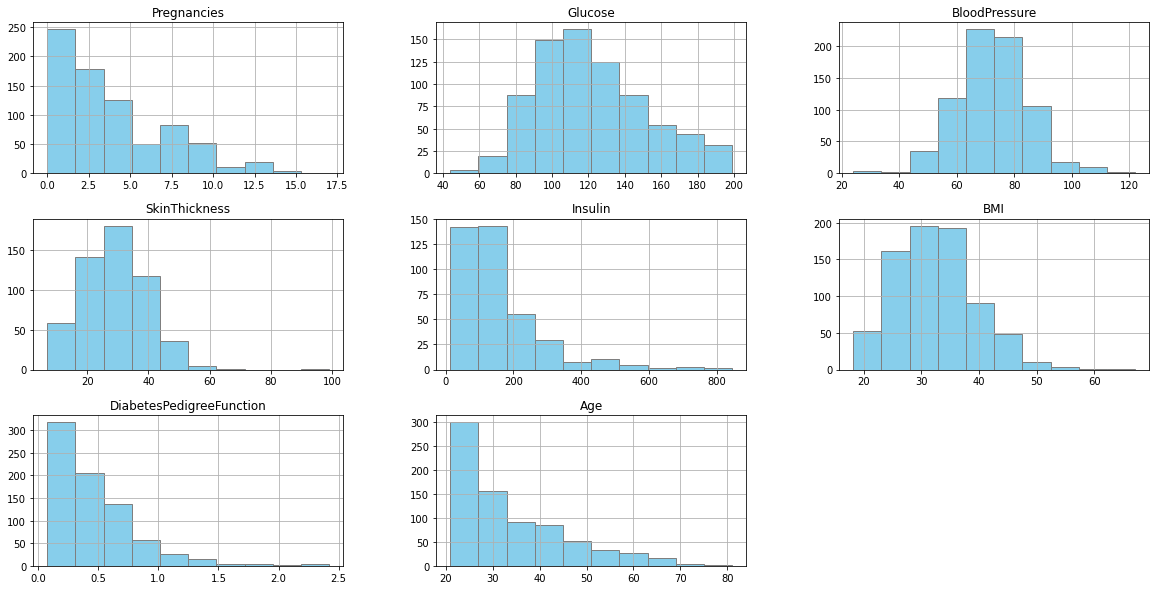

In [ ]:
#HISTOGRAMAS con filtrado
df_filtrado_histograma = df_filtrado[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_filtrado_histograma.hist(figsize = (20,10), grid=True, color = "skyblue", linewidth=1, edgecolor='tab:grey')

En estos nuevos histogramas se observa que los datos inválidos fueron eliminados.

### Boxplots I

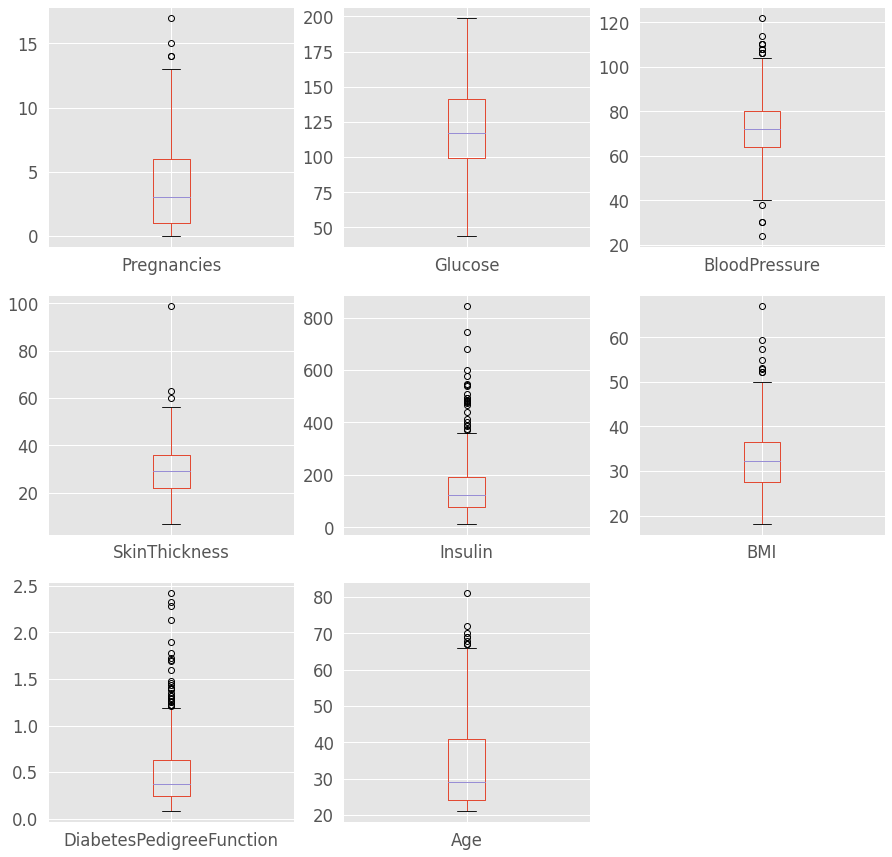

In [ ]:
plt.style.use('ggplot')
df_filtrado_histograma.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

La única variable que no presenta outliers es la glucosa. Las demas presentan varios outliers, destacándose la de pedigree y la insulina como las que tienen mayor cantidad.  




### Valores nulos



In [110]:
#Cantidad de valores nulos en dataframe filtrado
print(df_filtrado.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### Reemplazo de valores nulos

Se divide al dataset en 2 subsets: train y test. Luego, se reemplazan los valores nulos por el valor medio de cada una de las variables. A continuación se detalla el procedimiento:

In [111]:
#PASO 1: División del dataset en TRAIN y TEST (80% de los datos en train)
x_train, x_test, y_train, y_test = train_test_split(df_filtrado[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']], df_filtrado[['Outcome']], test_size = 0.2, random_state = 3)

In [112]:
#Valores nulos en x_train
print(x_train.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                26
SkinThickness               180
Insulin                     295
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [113]:
#Muestro los primeros datos de x_train. Se destaca que en la primera muestra hay 3 "valores" NaN
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
468,8,120.0,NaN,NaN,NaN,30.0,0.183,38
478,8,126.0,74.0,38.0,75.0,25.9,0.162,39
107,4,144.0,58.0,28.0,140.0,29.5,0.287,37
304,3,150.0,76.0,NaN,NaN,21.0,0.207,37
515,3,163.0,70.0,18.0,105.0,31.6,0.268,28


In [114]:
#PASO 2: Guardo la media de cada columna de x_train
medias=x_train.mean()
print(medias)

Pregnancies                   3.815961
Glucose                     121.285714
BloodPressure                72.500000
SkinThickness                28.960829
Insulin                     158.401254
BMI                          32.250579
DiabetesPedigreeFunction      0.464588
Age                          33.309446
dtype: float64


In [115]:
#PASO 3: Reemplazo a los NaN en x_train por la media de la columna a la que pertenecen 
#En x_train solo hay valores nulos en estas 4 columnas:
x_train['Glucose'] = x_train['Glucose'].fillna((medias[1]))
x_train['BloodPressure'] = x_train['BloodPressure'].fillna((medias[2]))
x_train['SkinThickness'] = x_train['SkinThickness'].fillna((medias[3]))
x_train['Insulin'] = x_train['Insulin'].fillna((medias[4]))
x_train['BMI'] = x_train['BMI'].fillna((medias[5]))

In [116]:
#Valores nulos en x_train actualizado
print(x_train.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [117]:
#Muestro los primeros datos de x_train actualizado. 
#Se destaca que en la primera muestra ya no hay 3 "valores" NaN, ya que se reemplazaron por las medias de cada columna.
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
468,8,120.0,72.5,28.960829,158.401254,30.0,0.183,38
478,8,126.0,74.0,38.000000,75.000000,25.9,0.162,39
107,4,144.0,58.0,28.000000,140.000000,29.5,0.287,37
304,3,150.0,76.0,28.960829,158.401254,21.0,0.207,37
515,3,163.0,70.0,18.000000,105.000000,31.6,0.268,28


In [118]:
#Valores nulos en x_test
print(x_test.isnull().sum())

Pregnancies                  0
Glucose                      0
BloodPressure                9
SkinThickness               47
Insulin                     79
BMI                          2
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


In [119]:
#PASO 4: Reemplazo a los NaN en x_test por la media correspondiente de x_train 
#En x_test solo hay valores nulos en estas columnas:
x_test['BloodPressure'] = x_test['BloodPressure'].fillna((medias[2]))
x_test['SkinThickness'] = x_test['SkinThickness'].fillna((medias[3]))
x_test['Insulin'] = x_test['Insulin'].fillna((medias[4]))
x_test['BMI'] = x_test['BMI'].fillna((medias[5]))

In [120]:
#Valores nulos en x_test actualizado
print(x_test.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


### Correlación entre variables

En la siguiente matriz se muestra el nivel de correlación entre variables.

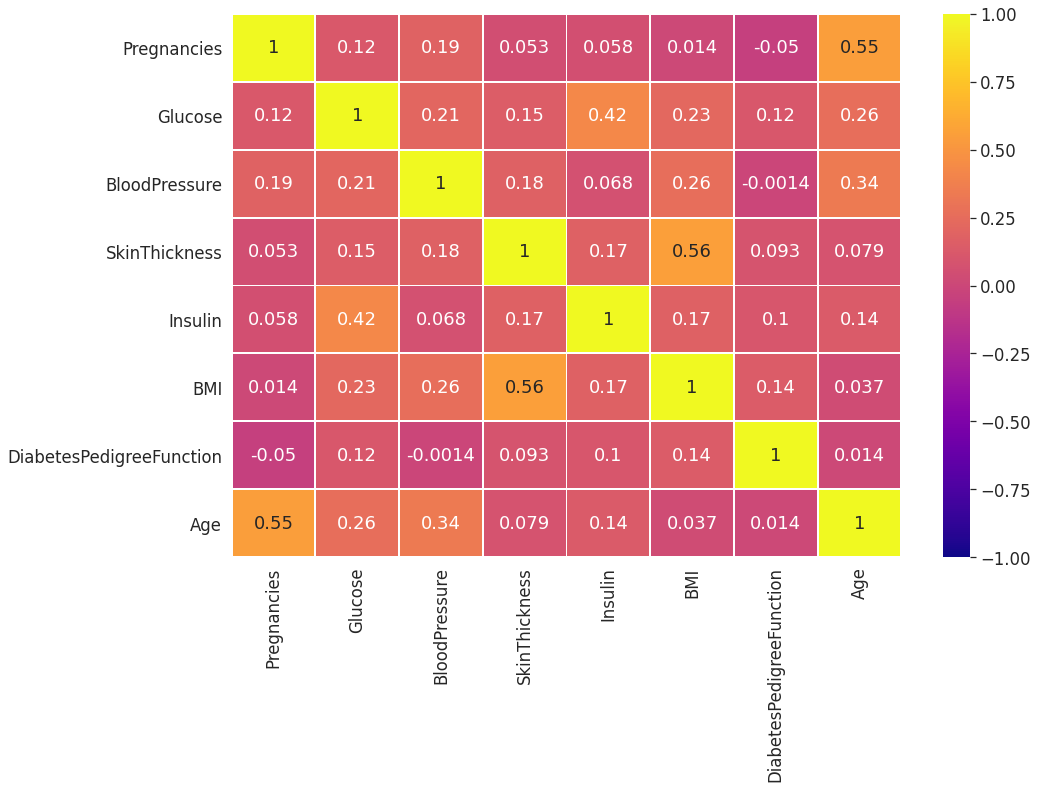

In [ ]:
corr = x_train.corr()
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

Las celdas con tonos mas amarillos presentan mayor nivel de correlación. Se destaca que las variables con nivel de correlación mas altos son:

*   BMI y grosor de piel
*   Embarazos y edad
*   Insulina y Glucosa



En el siguiente gráfico se muestran mini gráficos de dispersión entre variables, diferenciando la presencia o ausencia de diabetes. En particular, en la diagonal se compara para cada una de las variables cual es el comportamiento según la condición de diabetes.

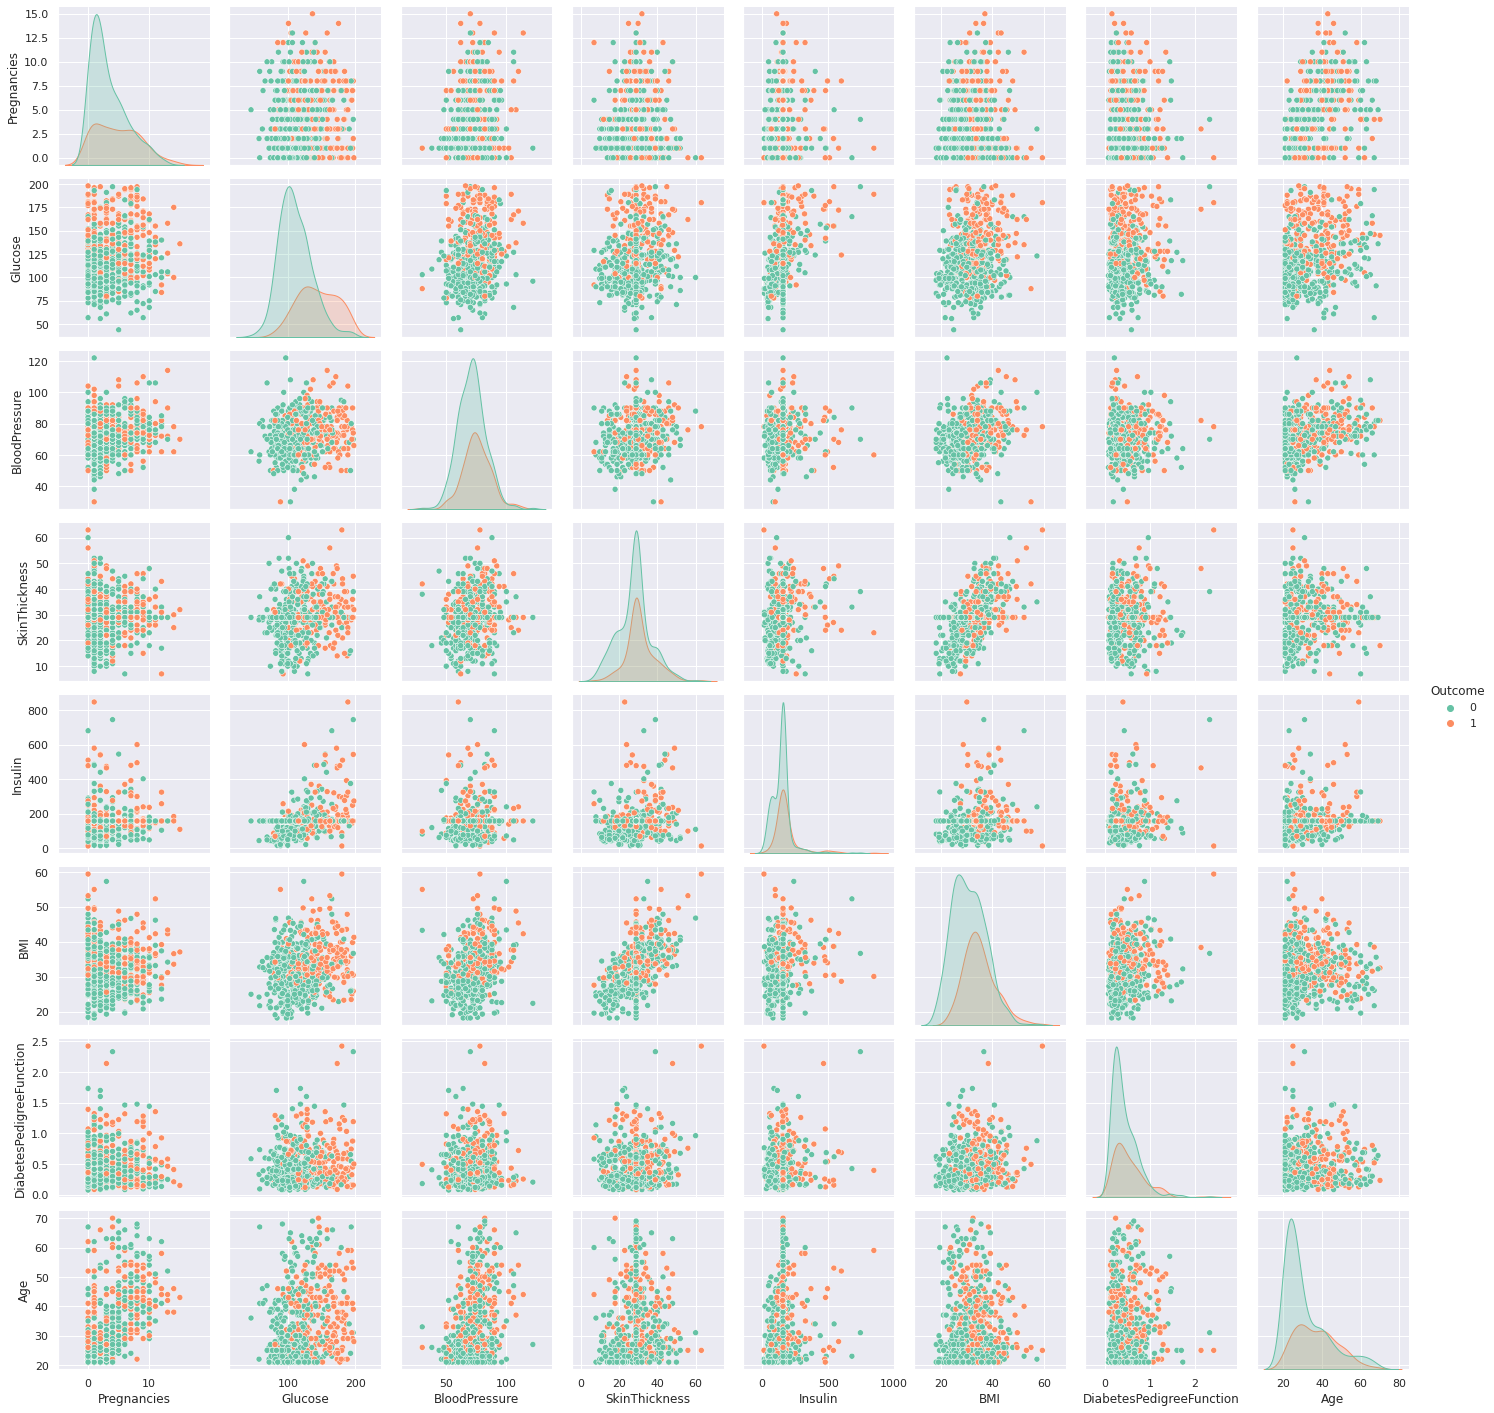

In [ ]:
train_set = x_train.merge(y_train, left_index=True, right_index=True)
sns.set(font_scale = 1)
sns.pairplot(data = train_set, hue = 'Outcome', diag_kind = 'kde', palette = 'Set2')

Las variables que comparan con la variable 'Pregnancies' presentan gráficas con ciertas lineas ya que esta es discreta. 

El par de variables BMI-SkinThickness presenta una tendencia linear, como era de esperarse por su alto nivel de correlación. 

En las gráficas de dispersión de la glucosa se puede observar que hay bastante separación de puntos verdes y naranjas, lo que podría indicar diferentes tendencias para las categorias de 'Outcome'.

### Boxplots II

Los siguientes boxplots muestran datos según la condición de diabetes.

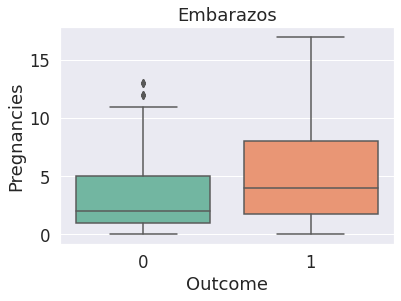

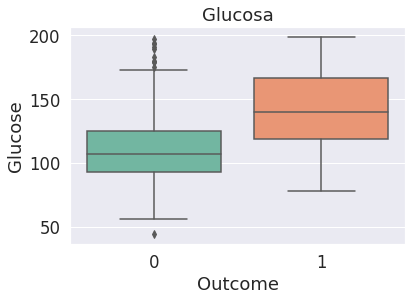

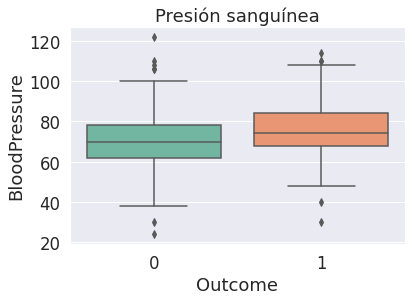

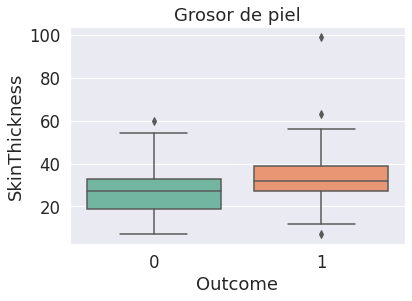

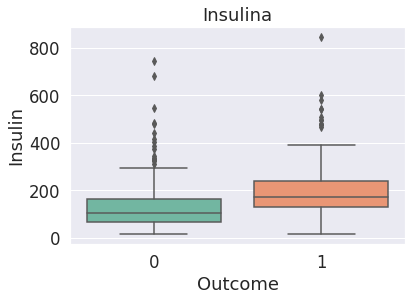

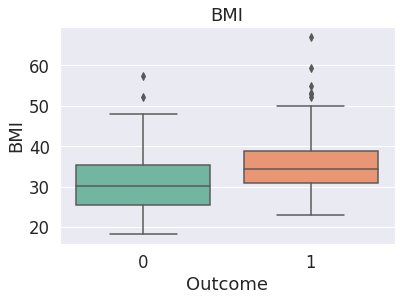

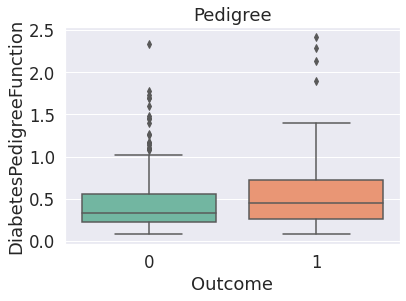

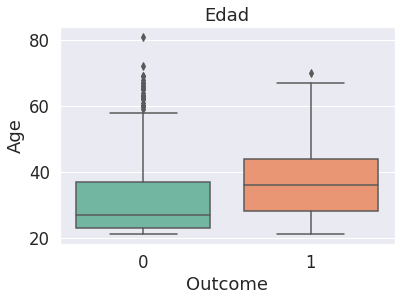

In [ ]:
#Embarazos
sns.boxplot( x=df["Outcome"], y=df["Pregnancies"], palette="Set2");
plt.title('Embarazos')
plt.show()
#Glucosa
sns.boxplot( x=df["Outcome"], y=df["Glucose"], palette="Set2");
plt.title('Glucosa')
plt.show()
#Presión sanguínea
sns.boxplot( x=df["Outcome"], y=df["BloodPressure"], palette="Set2");
plt.title('Presión sanguínea')
plt.show()
#Grosor de piel
sns.boxplot( x=df["Outcome"], y=df["SkinThickness"], palette="Set2");
plt.title('Grosor de piel')
plt.show()
#Insulina
sns.boxplot( x=df["Outcome"], y=df["Insulin"], palette="Set2");
plt.title('Insulina')
plt.show()
#BMI
sns.boxplot( x=df["Outcome"], y=df["BMI"], palette="Set2");
plt.title('BMI')
plt.show()
#Pedigree
sns.boxplot( x=df["Outcome"], y=df["DiabetesPedigreeFunction"], palette="Set2");
plt.title('Pedigree')
plt.show()
#Edad
sns.boxplot( x=df["Outcome"], y=df["Age"], palette="Set2");
plt.title('Edad')
plt.show()

Se destaca que la insulina, la edad y la glucosa presentan valores muy diferentes de mediana entre los 2 grupos.

# Clasificador con sklearn


Se asume independencia entre las variables. Además, se tiene en cuenta que los datos no están balanceados (el 65% de los datos son de pacientes no diabéticos).


Paper sobre modelos de clasificador en mismo dataset: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiw-YWioOXvAhU4GbkGHXeDAmcQFjABegQIAhAD&url=https%3A%2F%2Fwww.sciencedirect.com%2Fscience%2Farticle%2Fpii%2FS1877050918308548%2Fpdf%3Fmd5%3D9fce3bfd567af07077f07a9300c6be38%26pid%3D1-s2.0-S1877050918308548-main.pdf&usg=AOvVaw3r_Tu6tOuNokSLBx4YOKQT

In [220]:
#Paso a array
x_train_array=np.ravel(x_train)
y_train_array=np.ravel(y_train)
x_test_array=np.ravel(x_test)
y_test_array=np.ravel(y_test)


x_train2=x_train[['Glucose','BloodPressure','Insulin','BMI']]
x_test2=x_test[['Glucose','BloodPressure','Insulin','BMI']]
x_train2_array=np.ravel(x_train2)
x_test2_array=np.ravel(x_test2)

A continuación se analizarán 2 casos: un modelo con todas las variables del dataset filtrado y otro con menor cantidad.

## Modelo 1

In [216]:
#MODELO 1 --> 8 variables: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'.

gnb1 = GaussianNB()
#Entrenamiento del modelo 
y_pred1 = gnb1.fit(x_train, y_train_array).predict(x_test)
print("Cantidad de puntos mal clasificados de %d puntos totales : %d" % (x_test.shape[0], (y_test.values.reshape(y_test.values.shape[0],) != y_pred1).sum()))
#Predicción
y_pred_train1 = gnb1.fit(x_train, y_train_array).predict(x_train)
print("Cantidad de puntos mal clasificados de %d puntos totales: %d" % (x_train.shape[0], (y_train.values.reshape(y_train.values.shape[0],) != y_pred_train1).sum()))

Cantidad de puntos mal clasificados de 154 puntos totales : 41
Cantidad de puntos mal clasificados de 614 puntos totales: 145


## Modelo 2

In [173]:
#MODELO 2: 4 variables --> 'Glucose','BloodPressure','Insulin','BMI'

gnb2 = GaussianNB()
#Entrenamiento del modelo 
y_pred2 = gnb2.fit(x_train2, y_train_array).predict(x_test2)
print("Cantidad de puntos mal clasificados de %d puntos totales : %d" % (x_test2.shape[0], (y_test.values.reshape(y_test.values.shape[0],) != y_pred2).sum()))
#Predicción
y_pred_train2 = gnb2.fit(x_train2, y_train_array).predict(x_train2)
print("Cantidad de puntos mal clasificados de %d puntos totales : %d" % (x_train2.shape[0], (y_train.values.reshape(y_train.values.shape[0],) != y_pred_train2).sum()))

Cantidad de puntos mal clasificados de 154 puntos totales : 48
Cantidad de puntos mal clasificados de 614 puntos totales : 138


In [ ]:
y_test['Outcome'].value_counts(normalize=True)

0    0.597403
1    0.402597
Name: Outcome, dtype: float64

In [ ]:
y_test['Outcome'].value_counts(normalize=False)

0    92
1    62
Name: Outcome, dtype: int64

# Clasificador a mano




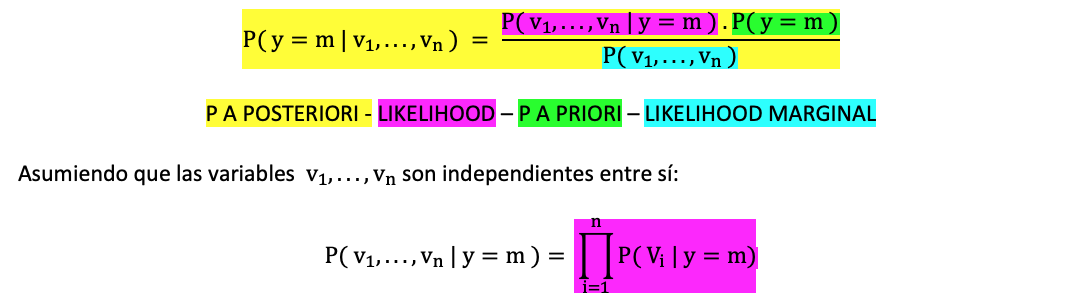

En este caso:

*   CLASES: m0,m1 = no diabético, diabético
*   VARIABLES: v1, ..., v8 = 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

El likelihood marginal no lo calcularé ya que mi clasificación es independiente de este valor.


**Likelihood**

Asumiendo que cada una de las variables tiene **distribución gaussiana**, a cada una se relacionan una media y un desvío estandar particulares.

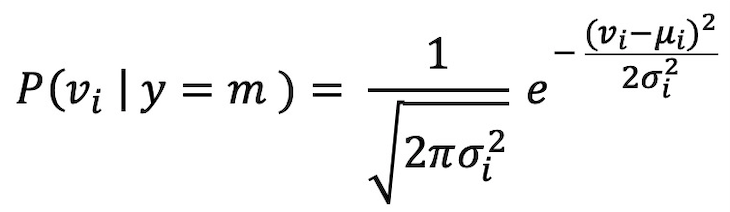

## Modelo 3

Utilizando todos los atributos

In [240]:
#LIKELIHOOD Y LOG LIKELIHOOD
def likelihood(x, x_df, n, m, bool_log):
  #n: cant variables
  #m: cant clases
  m=2
  #x: vector de entrada (una fila con datos de cada atributo) 1xn
  #x_df: dataframe

  df0 = df[(df['Outcome'] == 0)]
  df1 = df[(df['Outcome'] != 0)]

  #means: vector con medias mu de cada variable 
  means0=df0.mean(numeric_only=True)
  means1=df0.mean(numeric_only=True)
  #dse: vector con desvío estandar sigma de cada variable 
  dse0=df0.std()
  dse1=df1.std()

  #Función de probabilidad gaussiana : fpg
	#exponente = exp(-((x-mu)**2 / (2 * sigma**2 )))
	#fpg=(1 / (sqrt(2 * pi) * sigma)) * exponente

  #PROB CONDICIONALES: P(Vn=xn|y=m)
  #pcond: mxn 
  pcond = np.zeros((2,n))
  likelihood=np.zeros((2,1))
  for ii in range (0,n):
    mu0=means0[ii]
    mu1=means1[ii]
    sigma0=dse0[ii]
    sigma1=dse1[ii]
    xn=x[ii]

    exp0=-((xn-mu0)**2/(2*(sigma0**2)))
    fpg0=(1/((2*math.pi)**0.5)*sigma0)**exp0
    exp1=-((xn-mu1)**2/(2*(sigma1**2)))
    fpg1=(1/((2*math.pi)**0.5)*sigma1)**exp1

    if bool_log:
      pcond[0,ii]=np.log(fpg0)
      pcond[1,ii]=np.log(fpg1)
      likelihood[0,0]=np.sum(pcond[0,:])
      likelihood[1,0]=np.sum(pcond[1,:])
    else: 
      pcond[0,ii]=fpg0
      pcond[1,ii]=fpg1
      likelihood[0,0]=np.prod(pcond[0,:])
      likelihood[1,0]=np.prod(pcond[1,:])

  return likelihood

#PROBABILIDADES A PRIORI
def ppriori(y):
  #y: vector con clasificaciones numéricas - valores de 0 a m-1
  #m: cantidad de clases
  #r: vector con la p priori de cada clase en orden numérico
  r=[]
  for i in range(0,2):
    target_bool = np.array(y == i)
    target = 1*target_bool
    r.append(np.sum(target)/len(target))
  return r

#PROBABILIDAD A POSTERIORI modificada - Comparador final
def pposteriori(likelihood, ppriori, bool_log):
  if bool_log:
    p0=likelihood[0,0]+np.log(ppriori[0])
    p1=likelihood[1,0]+np.log(ppriori[1])
  else:
    p0=likelihood[0,0]*ppriori[0]
    p1=likelihood[1,0]*ppriori[1]

  if p0>p1:
    print('Clasificación: Clase 0 - NO DIABÉTICO')
  else:
    print('Clasificación: Clase 1 - DIABÉTICO')
  print('p0=',p0, ' - p1=',p1)

def clasificador_manual1(x, x_train, y_train_array, bool_log):
  like=likelihood(x, x_train, 8, 2, bool_log)
  r=ppriori(y_train_array)
  p=pposteriori(like,r,bool_log)

In [171]:
#Prueba individual
print(x_train.iloc[305])
print(y_train.iloc[305])
x=[1,89,66,23,94,28.1,0.167,21]

Pregnancies                  1.000
Glucose                     89.000
BloodPressure               66.000
SkinThickness               23.000
Insulin                     94.000
BMI                         28.100
DiabetesPedigreeFunction     0.167
Age                         21.000
Name: 3, dtype: float64
Outcome    0
Name: 3, dtype: int64


In [180]:
hola=clasificador_manual1(x, x_train, y_train_array, False)

Clasificación: Clase 0 - NO DIABÉTICO
p0= 0.18800816242816298  - p1= 0.08483826442236815


In [241]:
def clasificador3(x_test_array, x_train, y_train_array, bool_log):
  data=np.reshape(x_test_array, (-1,8))
  nfilas=data.shape[0]
  y_pred3=np.zeros((nfilas,1))
  for i in range (0,nfilas):
    fila=data[i,:]
    like=likelihood(fila, x_train, 8, 2, bool_log)
    r=ppriori(y_test_array)
    
    if bool_log:
      p0=like[0,0]+np.log(r[0])
      p1=like[1,0]+np.log(r[1])
    else:
      p0=like[0,0]*r[0]
      p1=like[1,0]*r[1]

    if p0>p1:
      y_pred3[i,0]=0
    else:
      y_pred3[i,0]=1
  
  return y_pred3

In [242]:
y_pred3=clasificador3(x_test_array, x_train, y_train_array, bool_log=True)

## Modelo 4

Utilizando 4 de los atributos: 'Glucose', 'BloodPressure', 'Insulin', 'BMI'.

In [181]:
#LIKELIHOOD Y LOG LIKELIHOOD
def likelihood(x, x_df, n, m, bool_log):
  #n: cant variables
  #m: cant clases
  m=2
  #x: vector de entrada (una fila con datos de cada atributo) 1xn
  #x_df: dataframe

  df0 = df[(df['Outcome'] == 0)]
  df1 = df[(df['Outcome'] != 0)]

  #means: vector con medias mu de cada variable 
  means0=df0.mean(numeric_only=True)
  means1=df0.mean(numeric_only=True)
  #dse: vector con desvío estandar sigma de cada variable 
  dse0=df0.std()
  dse1=df1.std()

  #Función de probabilidad gaussiana : fpg
	#exponente = exp(-((x-mu)**2 / (2 * sigma**2 )))
	#fpg=(1 / (sqrt(2 * pi) * sigma)) * exponente

  #PROB CONDICIONALES: P(Vn=xn|y=m)
  #pcond: mxn 
  pcond = np.zeros((2,n))
  likelihood=np.zeros((2,1))
  for ii in range (0,n):
    mu0=means0[ii]
    mu1=means1[ii]
    sigma0=dse0[ii]
    sigma1=dse1[ii]
    xn=x[ii]

    exp0=-((xn-mu0)**2/(2*(sigma0**2)))
    fpg0=(1/((2*math.pi)**0.5)*sigma0)**exp0
    exp1=-((xn-mu1)**2/(2*(sigma1**2)))
    fpg1=(1/((2*math.pi)**0.5)*sigma1)**exp1

    if bool_log:
      pcond[0,ii]=np.log(fpg0)
      pcond[1,ii]=np.log(fpg1)
      likelihood[0,1]=np.sum(pcond[0,:])
      likelihood[1,1]=np.sum(pcond[1,:])
    else: 
      pcond[0,ii]=fpg0
      pcond[1,ii]=fpg1
      likelihood[0,0]=np.prod(pcond[0,:])
      likelihood[1,0]=np.prod(pcond[1,:])

  return likelihood

#PROBABILIDADES A PRIORI
def ppriori(y):
  #y: vector con clasificaciones numéricas - valores de 0 a m-1
  #m: cantidad de clases
  #r: vector con la p priori de cada clase en orden numérico
  r=[]
  for i in range(0,2):
    target_bool = np.array(y == i)
    target = 1*target_bool
    r.append(np.sum(target)/len(target))
  return r

#PROBABILIDAD A POSTERIORI modificada - Comparador final
def pposteriori(likelihood, ppriori, bool_log):
  if bool_log:
    p0=likelihood[0,0]+np.log(ppriori[0])
    p1=likelihood[1,0]+np.log(ppriori[1])
  else:
    p0=likelihood[0,0]*ppriori[0]
    p1=likelihood[1,0]*ppriori[1]


  if p0>p1:
    print('Clasificación: Clase 0 - NO DIABÉTICO')
  else:
    print('Clasificación: Clase 1 - DIABÉTICO')
  
  print('p0=',p0, ' - p1=',p1)
  

def clasificador_manual2(x, x_train, y_train_array, bool_log):
  like=likelihood(x, x_train2, 4, 2, bool_log)
  r=ppriori(y_train_array)
  p=pposteriori(like,r,bool_log)

In [182]:
#Prueba individual
rrrr=clasificador_manual2(x, x_train, y_train_array, False)

Clasificación: Clase 0 - NO DIABÉTICO
p0= 0.20447527200367946  - p1= 0.12595536936590584


In [230]:
def clasificador4(x_test2_array, x_train2, y_train_array, bool_log):
  data=np.reshape(x_test2_array, (-1,4))
  nfilas=data.shape[0]
  y_pred4=np.zeros((nfilas,1))
  for i in range (0,nfilas):
    fila=data[i,:]
    like=likelihood(fila, x_train, 4, 2, bool_log)
    r=ppriori(y_test_array)
    
    if bool_log:
      p0=like[0,0]+np.log(r[0])
      p1=like[1,0]+np.log(r[1])
    else:
      p0=like[0,0]*r[0]
      p1=like[1,0]*r[1]

    if p0>p1:
      y_pred4[i,0]=0
    else:
      y_pred4[i,0]=1
  
  return y_pred4

In [246]:
y_pred4=clasificador4(x_test2_array, x_train2, y_train_array, bool_log=True)

# Métricas

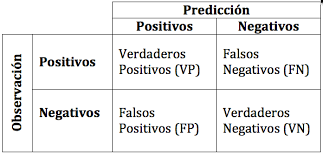


**Interpretación de matriz de confusión:**

Dados los valores de VP, VN, FN y FP, y tomando al positivo como diabetes, se considera que:


*   El modelo precide que "VP" mujeres son diabéticas y realmente lo son.
*   El modelo precide que "VN" mujeres son diabéticas y en realidad NO lo son.
*   El modelo precide que "VN" mujeres no son diabéticas y realmente no lo son.
*   El modelo precide que "FN" mujeres no son diabéticas y en realidad lo son.


**Interpretación de Accuracy:** Qué tan frecuente es que el modelo acierte.


Accuracy:  0.7337662337662337
Sensibilidad: 0.612903
Especificidad: 0.815217
Valor Predictivo Positivo: 0.690909
Valor Predictivo Negativo: 0.757576


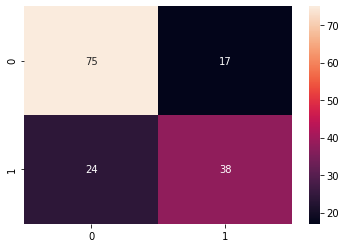

In [219]:
#MODELO 1
#ACCURACY
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred1))
#MATRIZ DE CONFUSIÓN
nbConfusion = metrics.confusion_matrix(y_test, y_pred1)
#metrics.plot_confusion_matrix(gnb1, x_test, y_test)
#plt.title('Matriz de confusión')  
#plt.show()

#Heat Map
df_cm1 = pd.DataFrame(nbConfusion)
sn.heatmap(df_cm1, annot=True)

VP = nbConfusion[1,1]
VN = nbConfusion[0,0]
FP = nbConfusion[0,1]
FN = nbConfusion[1,0]

sensibilidad = VP/(VP+FN)
especificidad = VN/(VN+FP)
vpp = VP/(VP+FP)
vpn = VN/(VN+FN)

print("Sensibilidad: %f" % sensibilidad)
print("Especificidad: %f" % especificidad)
print("Valor Predictivo Positivo: %f" % vpp)
print("Valor Predictivo Negativo: %f" % vpn)

Accuracy:  0.6883116883116883
Sensibilidad: 0.451613
Especificidad: 0.847826
Valor Predictivo Positivo: 0.666667
Valor Predictivo Negativo: 0.696429


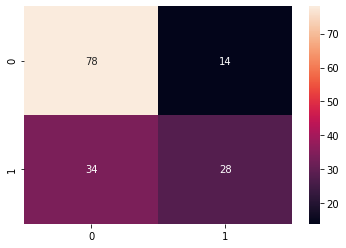

In [214]:
#MODELO 2
#ACCURACY
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2))
#MATRIZ DE CONFUSIÓN
nbConfusion2 = metrics.confusion_matrix(y_test, y_pred2)
#metrics.plot_confusion_matrix(gnb2, x_test2, y_test)
#plt.title('Matriz de confusión')  
#plt.show()

#Heat Map
df_cm2 = pd.DataFrame(nbConfusion2)
sn.heatmap(df_cm2, annot=True)

VP2 = nbConfusion2[1,1]
VN2 = nbConfusion2[0,0]
FP2 = nbConfusion2[0,1]
FN2 = nbConfusion2[1,0]

sensibilidad2 = VP2/(VP2+FN2)
especificidad2 = VN2/(VN2+FP2)
vpp2 = VP2/(VP2+FP2)
vpn2 = VN2/(VN2+FN2)

print("Sensibilidad: %f" % sensibilidad2)
print("Especificidad: %f" % especificidad2)
print("Valor Predictivo Positivo: %f" % vpp2)
print("Valor Predictivo Negativo: %f" % vpn2)

Accuracy:  0.5909090909090909
Sensibilidad: 0.370968
Especificidad: 0.739130
Valor Predictivo Positivo: 0.489362
Valor Predictivo Negativo: 0.635514


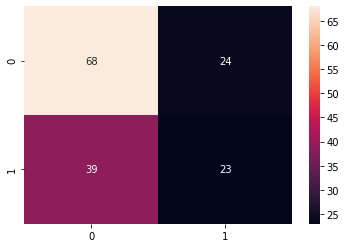

In [243]:
#MODELO 3
#ACCURACY
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred3))
#MATRIZ DE CONFUSIÓN
nbConfusion3 = metrics.confusion_matrix(y_test, y_pred3)

VP3 = nbConfusion3[1,1]
VN3 = nbConfusion3[0,0]
FP3 = nbConfusion3[0,1]
FN3 = nbConfusion3[1,0]

sensibilidad3 = VP3/(VP3+FN3)
especificidad3 = VN3/(VN3+FP3)
vpp3 = VP3/(VP3+FP3)
vpn3 = VN3/(VN3+FN3)

print("Sensibilidad: %f" % sensibilidad3)
print("Especificidad: %f" % especificidad3)
print("Valor Predictivo Positivo: %f" % vpp3)
print("Valor Predictivo Negativo: %f" % vpn3)

#Heat Map
df_cm3 = pd.DataFrame(nbConfusion3)
sn.heatmap(df_cm3, annot=True)

Accuracy:  0.6038961038961039
Sensibilidad: 0.016129
Especificidad: 1.000000
Valor Predictivo Positivo: 23.000000
Valor Predictivo Negativo: 0.601307


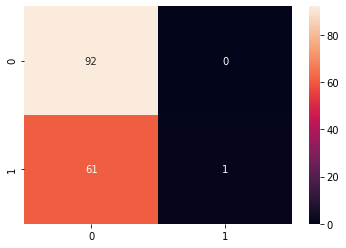

In [245]:
#MODELO 4
#ACCURACY
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred4))
#MATRIZ DE CONFUSIÓN
nbConfusion4 = metrics.confusion_matrix(y_test, y_pred4)

VP4 = nbConfusion4[1,1]
VN4 = nbConfusion4[0,0]
FP4 = nbConfusion4[0,1]
FN4 = nbConfusion4[1,0]

sensibilidad4 = VP4/(VP4+FN4)
especificidad4 = VN4/(VN4+FP4)
vpp4 = VP3/(VP4+FP4)
vpn4 = VN4/(VN4+FN4)

print("Sensibilidad: %f" % sensibilidad4)
print("Especificidad: %f" % especificidad4)
print("Valor Predictivo Positivo: %f" % vpp4)
print("Valor Predictivo Negativo: %f" % vpn4)

#Heat Map
df_cm4 = pd.DataFrame(nbConfusion4)
sn.heatmap(df_cm4, annot=True)

CONCLUSIONES

Comparando al modelo 1 con el 3 (mismos datos, distinto clasificador), se puede observar que el clasificador de sklearn tiene un mejor desempeño.

En cuanto al modelo 2 vs el 4, la función de sklearn tambien tiene un mejor desempeño, pero en menor diferencia. 

En cuanto a las métricas secundarias, se observan valores similares en todos los modelos, a excepción del caso particular del modelo 4 en la especificidad, mostrando un muy bajo desempeño en clasificación en categoría diabéticos.